Matplotlib is building the font cache; this may take a moment.


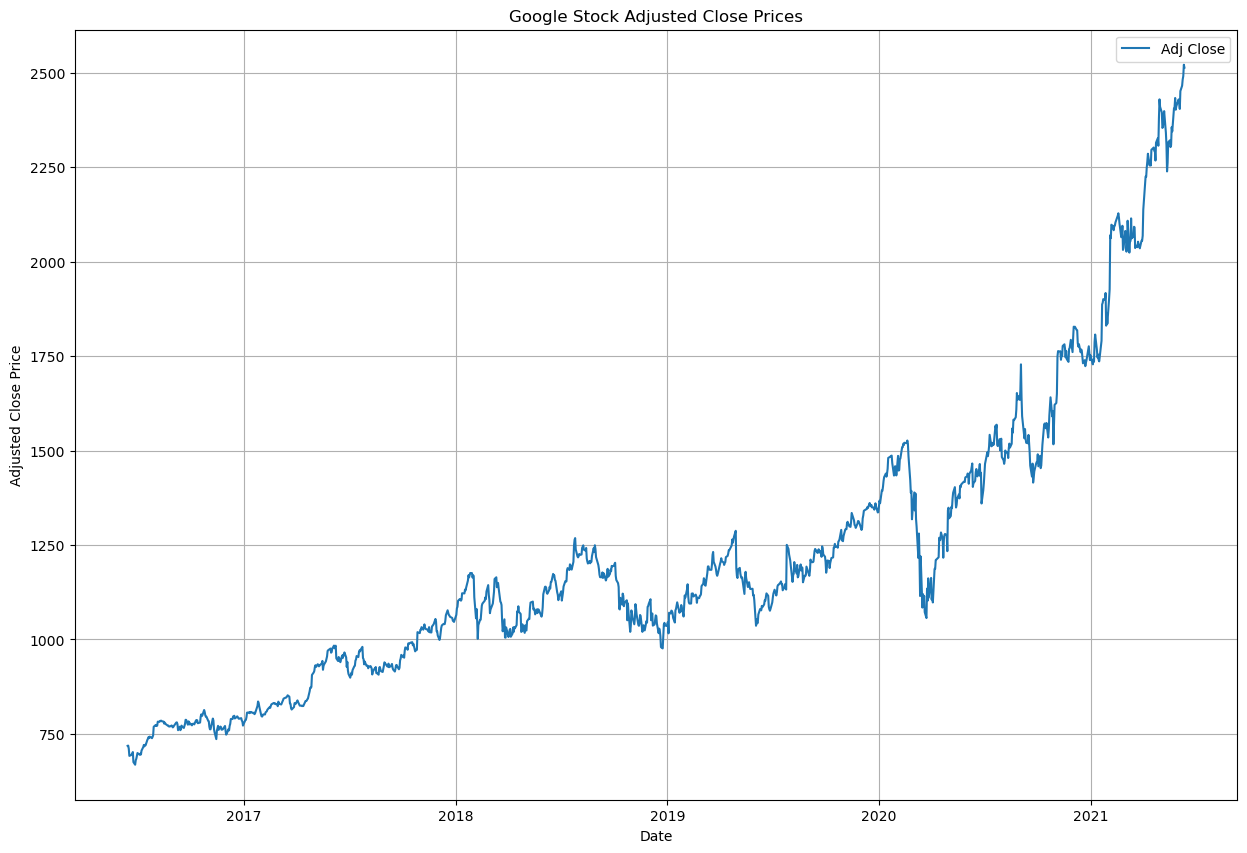

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('GOOG.csv', parse_dates=['date'])

df.set_index('date', inplace=True)

plt.figure(figsize=(15, 10))
plt.plot(df['adjClose'], label='Adj Close')
plt.title('Google Stock Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

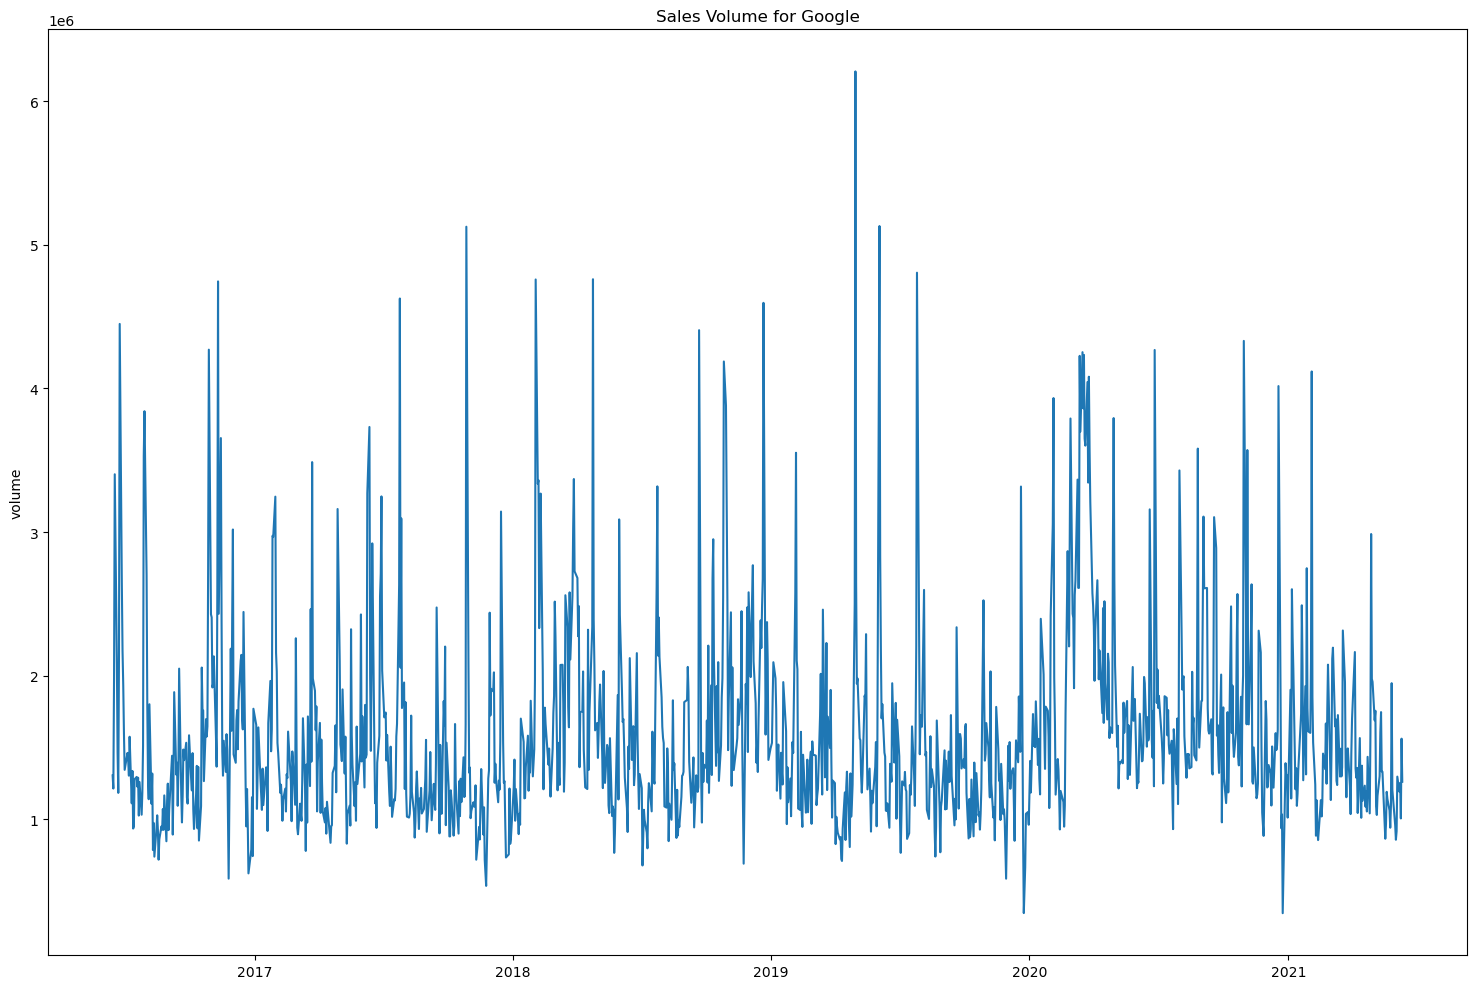

In [2]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.plot(df['volume'], label='Volume')
plt.title('Sales Volume for Google')
plt.ylabel('volume')
plt.xlabel(None)

plt.tight_layout()

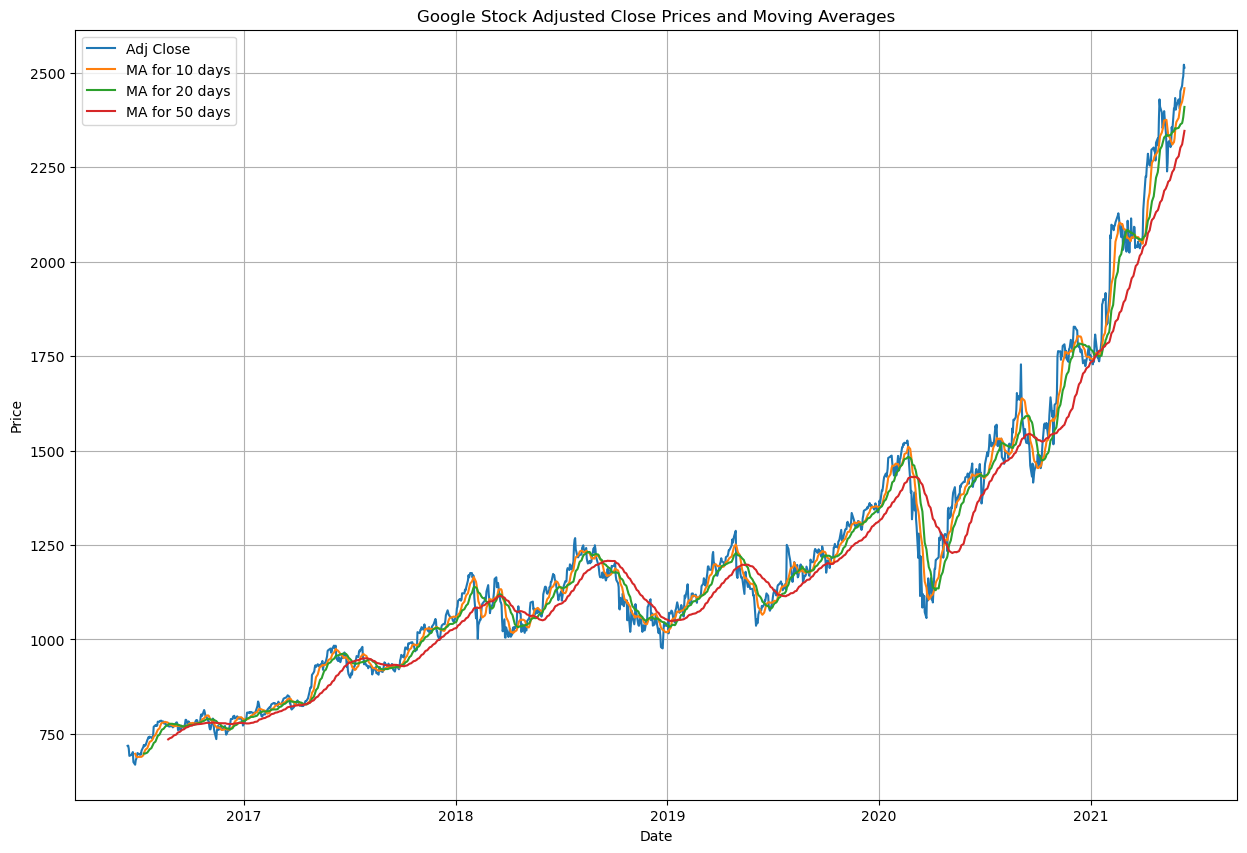

In [3]:

ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['adjClose'].rolling(window=ma).mean()

plt.figure(figsize=(15, 10))
plt.plot(df['adjClose'], label='Adj Close')
plt.plot(df['MA for 10 days'], label='MA for 10 days')
plt.plot(df['MA for 20 days'], label='MA for 20 days')
plt.plot(df['MA for 50 days'], label='MA for 50 days')

plt.title('Google Stock Adjusted Close Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

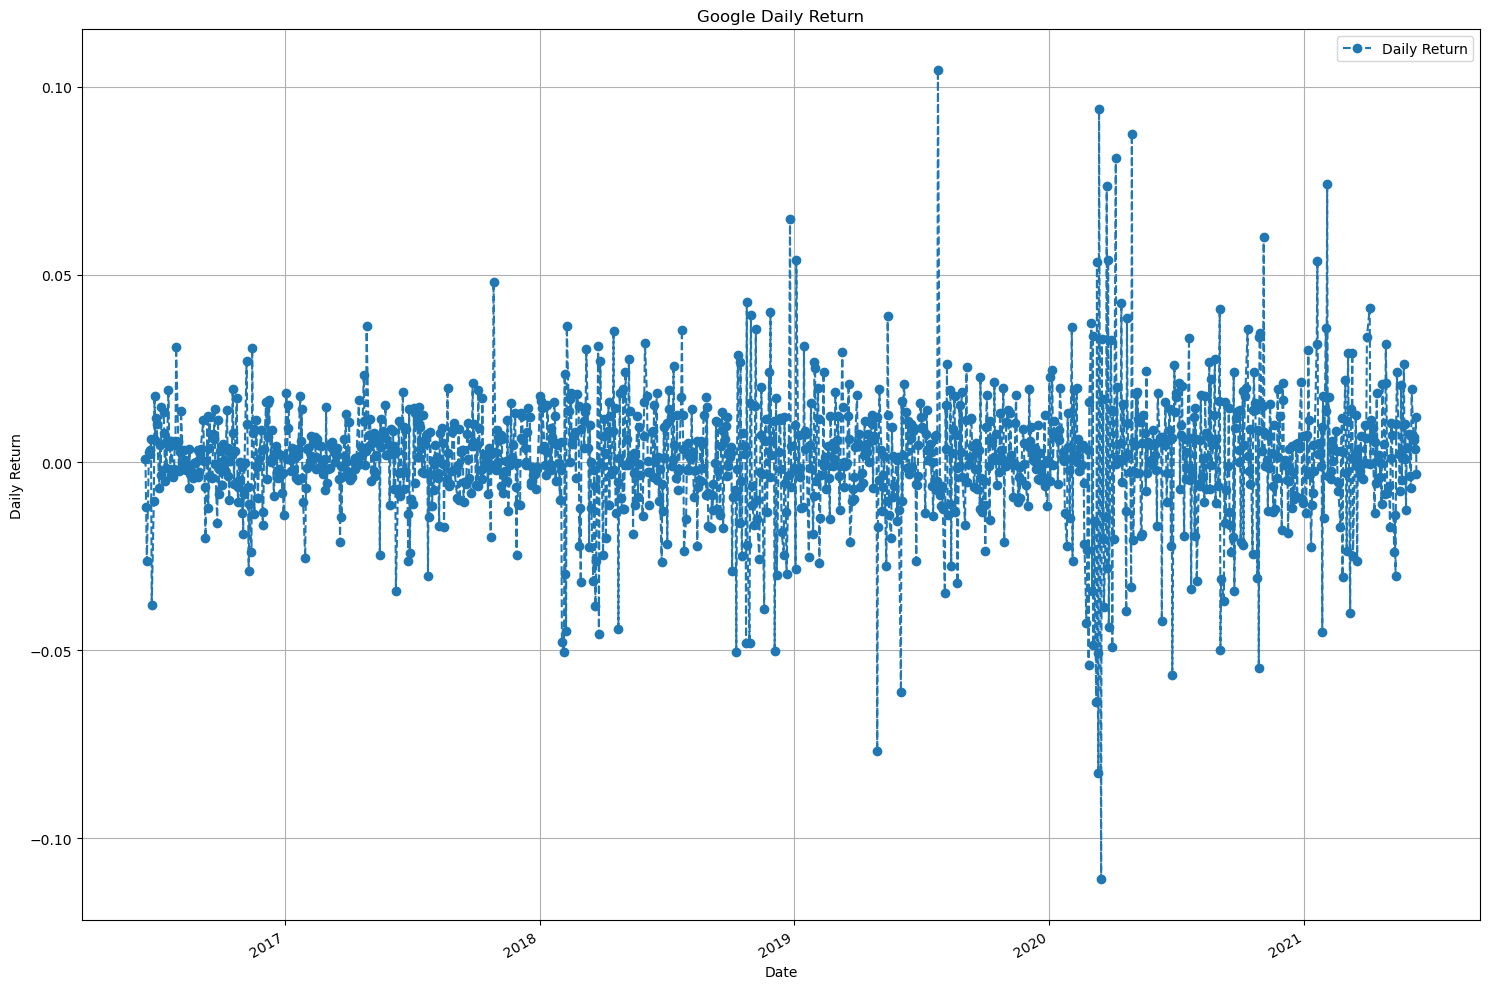

In [4]:
df['Daily Return'] = df['adjClose'].pct_change()

# Create subplots
fig, ax = plt.subplots(figsize=(15, 10))

# Plot Google daily return
df['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
ax.set_title('Google Daily Return')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Return')
ax.grid(True)

plt.tight_layout()
plt.show()

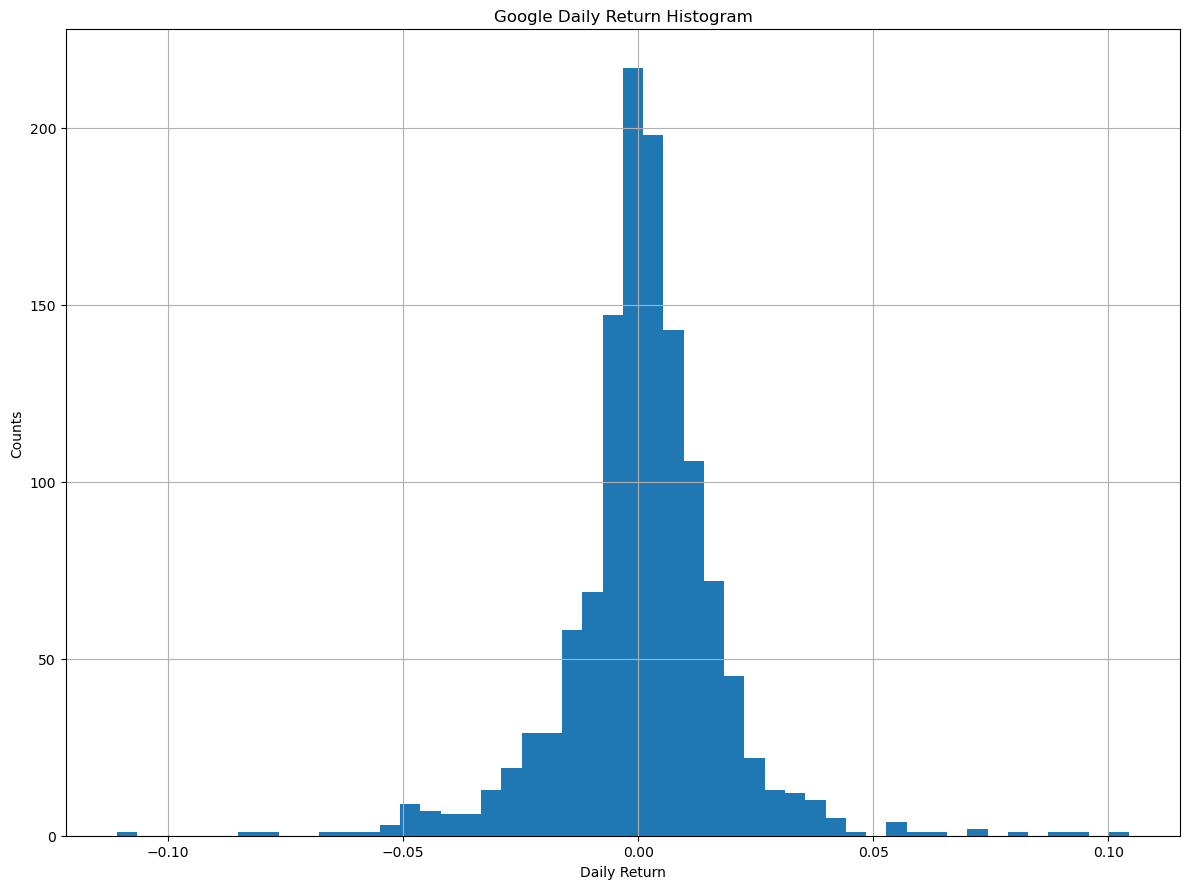

In [5]:

df['Daily Return'] = df['adjClose'].pct_change()

plt.figure(figsize=(12, 9))
df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('Google Daily Return Histogram')
plt.tight_layout()
plt.show()

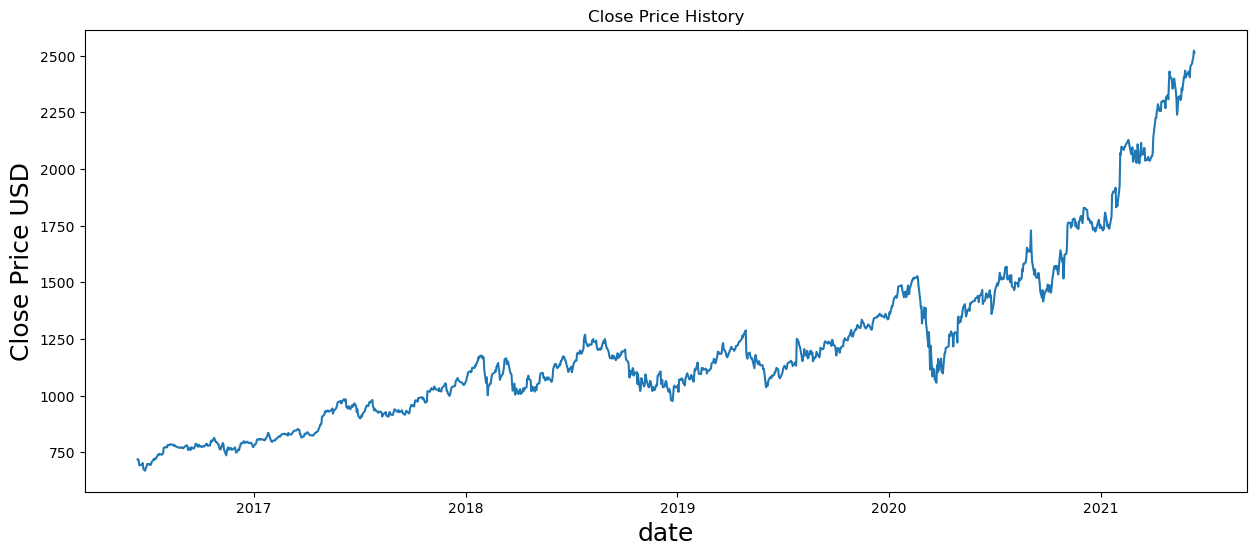

In [6]:
plt.figure(figsize=(15,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

In [7]:

data = df.filter(['close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .85))

training_data_len
print(dataset)

[[ 718.27]
 [ 718.92]
 [ 710.36]
 ...
 [2491.4 ]
 [2521.6 ]
 [2513.93]]


In [8]:
from sklearn.preprocessing import MinMaxScaler
data = df.filter(['close'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02698372],
       [0.02733443],
       [0.02271575],
       ...,
       [0.98370509],
       [1.        ],
       [0.99586153]])

In [10]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249,
       0.02628768, 0.02842975, 0.02783623, 0.03535239, 0.03706821,
       0.03935058, 0.03796929, 0.04018691, 0.03858439, 0.03785598,
       0.03966353, 0.04189733, 0.05424261, 0.05644944, 0.05547282,
       0.05661131, 0.05576419, 0.06148899, 0.06124079, 0.0625897 ,
       0.06281632, 0.06290805, 0.06202855, 0.06160769, 0.05874799,
       0.06024259, 0.05894223, 0.05781994, 0.05605555, 0.05601778,
       0.05470124, 0.05457714, 0.05464729, 0.05605555, 0.05440448,
       0.05330377, 0.05423721, 0.05568325, 0.06033432, 0.06048   ])]
[0.05776597925906746]

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01

In [15]:
pip install keras


  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/c2/88/eef50051a772dcb4433d1f3e4c1d6576ba450fe83e89d028d7e8b85a2122/keras-3.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/67/91/5474b84e505a6ccc295b2d322d90ff6aa0746745717839ee0c5fb4fdcceb/rich-13.9.2-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/89/d5/a999b5e995afb98676cc5671b91b4b160e87980fb3a852d1370507614ca1/optree-0.13.0-cp311-cp311-win_amd64.whl.metadata
     -----

In [18]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/p

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(40))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

d:\NOTES\Python\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1010/1010 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - loss: 0.0026


In [20]:

test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


85.37089776173818

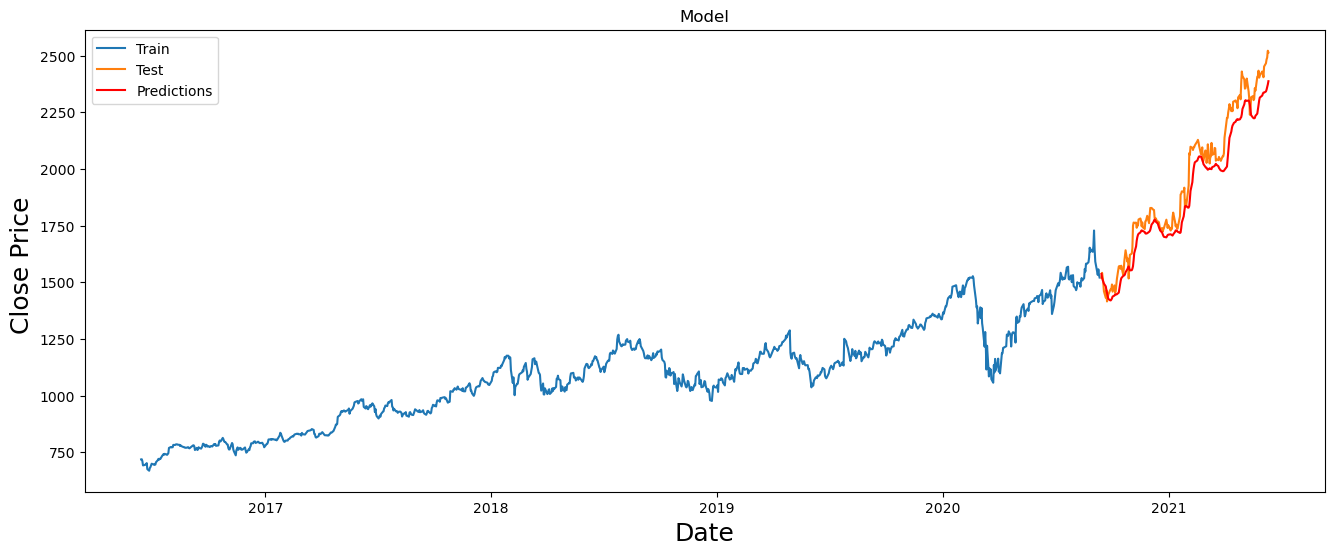

In [21]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:].copy()
if len(predictions) != len(valid):
    raise ValueError("The length of predictions must match the length of the validation set.")

valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['close'], label='Train')
plt.plot(valid['close'], label='Test')
plt.plot(valid['Predictions'], color='red', label='Predictions')
plt.legend(['Train', 'Test', 'Predictions'], loc='upper left')
plt.show()